In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 20
FirstStim = 8.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345596 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    for k in xrange(0, len(pools)):
        pools[k].reset()

103.089235 seconds
[ 0.]
[ 0.]
106.868474 seconds
[ 0.]
[ 0.]
108.612421 seconds
[ 0.]
[ 0.]
107.832674 seconds
[ 0.]
[ 0.]
108.015064 seconds
[ 0.]
[ 0.]
108.340903 seconds
[ 0.]
[ 0.03587172]
108.535111 seconds
[ 0.]
[ 0.33415559]
108.448302 seconds
[ 0.]
[ 1.08046563]
109.501926 seconds
[ 1.30158656]
[ 1.83140983]
109.282949 seconds
[ 1.88316702]
[ 2.57833264]
110.221611 seconds
[ 2.3619057]
[ 2.47747427]
110.335193 seconds
[ 2.88480832]
[ 1.9710395]
110.365464 seconds
[ 3.32859777]
[ 1.42139483]
110.990467 seconds
[ 3.72222588]
[ 1.00332071]
112.179079 seconds
[ 4.07592427]
[ 0.54693943]
112.072887 seconds
[ 4.25290376]
[ 0.25788443]
111.271002 seconds
[ 4.37456204]
[ 0.10112708]
114.302907 seconds
[ 4.41479816]
[ 0.00724435]
112.249197 seconds
[ 4.44638466]
[  1.25809643e-07]
112.382109 seconds
[ 4.44375925]
[  1.07487346e-07]


<IPython.core.display.Javascript object>


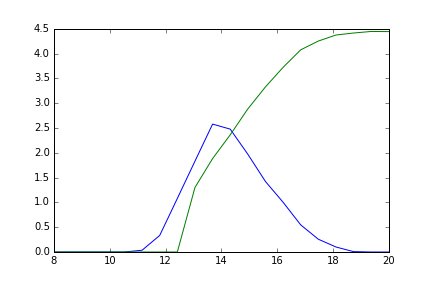

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.57987170250501618

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.30158656],
       [ 1.88316702],
       [ 2.3619057 ],
       [ 2.88480832],
       [ 3.32859777],
       [ 3.72222588],
       [ 4.07592427],
       [ 4.25290376],
       [ 4.37456204],
       [ 4.41479816],
       [ 4.44638466],
       [ 4.44375925]])

<IPython.core.display.Javascript object>


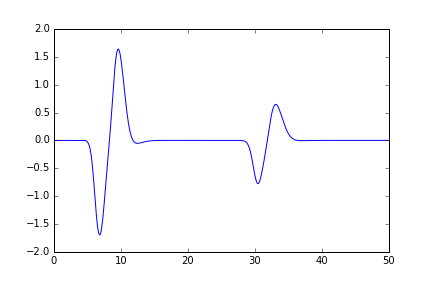

In [8]:
plt.figure()
plt.plot(t, emg[:,12])